In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import arma_generate_sample, ArmaProcess
sns.set_palette([ "#30a2da", "#fc4f30", "#e5ae38", "#6d904f", "#8b8b8b"])

ss = "/Users/samrioboli/Documents/ds320crime/data/crime.csv"

df = pd.read_csv(ss)
%matplotlib inline
df.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,NaN,2009-10,NaN,NaN
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,NaN,2009-05,NaN,NaN
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800.0,Other Assaults,NaN,2009-08,NaN,NaN
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,Weapon Violations,20.0,2009-07,-75.130477,40.036389
4,9,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600.0,All Other Offenses,8.0,2009-06,-75.166350,39.969532


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237605 entries, 0 to 2237604
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Dc_Dist             int64  
 1   Psa                 object 
 2   Dispatch_Date_Time  object 
 3   Dispatch_Date       object 
 4   Dispatch_Time       object 
 5   Hour                int64  
 6   Dc_Key              int64  
 7   Location_Block      object 
 8   UCR_General         float64
 9   Text_General_Code   object 
 10  Police_Districts    float64
 11  Month               object 
 12  Lon                 float64
 13  Lat                 float64
dtypes: float64(4), int64(3), object(7)
memory usage: 239.0+ MB


In [13]:
df.describe()

,Dc_Dist,Hour,Dc_Key,UCR_General,Police_Districts,Lon,Lat
count,2.237605e+06,2.237605e+06,2.237605e+06,2.236942e+06,2.217675e+06,2.220256e+06,2.220256e+06
mean,1.726837e+01,1.315990e+01,2.010975e+11,1.271354e+03,1.206404e+01,-7.514992e+01,3.999201e+01
std,1.064898e+01,6.799952e+00,3.234684e+08,8.143510e+02,5.792056e+00,5.973890e-02,4.534823e-02
min,1.000000e+00,0.000000e+00,1.998121e+11,1.000000e+02,1.000000e+00,-7.527773e+01,3.986999e+01
25%,9.000000e+00,9.000000e+00,2.008151e+11,6.000000e+02,8.000000e+00,-7.518490e+01,3.995571e+01
50%,1.600000e+01,1.400000e+01,2.011060e+11,8.000000e+02,1.200000e+01,-7.515668e+01,3.999105e+01
75%,2.400000e+01,1.900000e+01,2.014021e+11,1.800000e+03,1.700000e+01,-7.511844e+01,4.002739e+01
max,9.200000e+01,2.300000e+01,2.017770e+11,2.600000e+03,2.200000e+01,-7.495750e+01,4.013790e+01


In [14]:
df['Dispatch_Date_Time'] = pd.to_datetime(df['Dispatch_Date_Time'])
df.set_index('Dispatch_Date_Time', inplace=True)
df.sort_index(inplace=True)

In [15]:
df['month'] = df.index.month
df['year'] = df.index.year
df['day'] = df.index.day
df['crimes'] = 1

In [16]:
df = df[df.index < '2016-10-01']

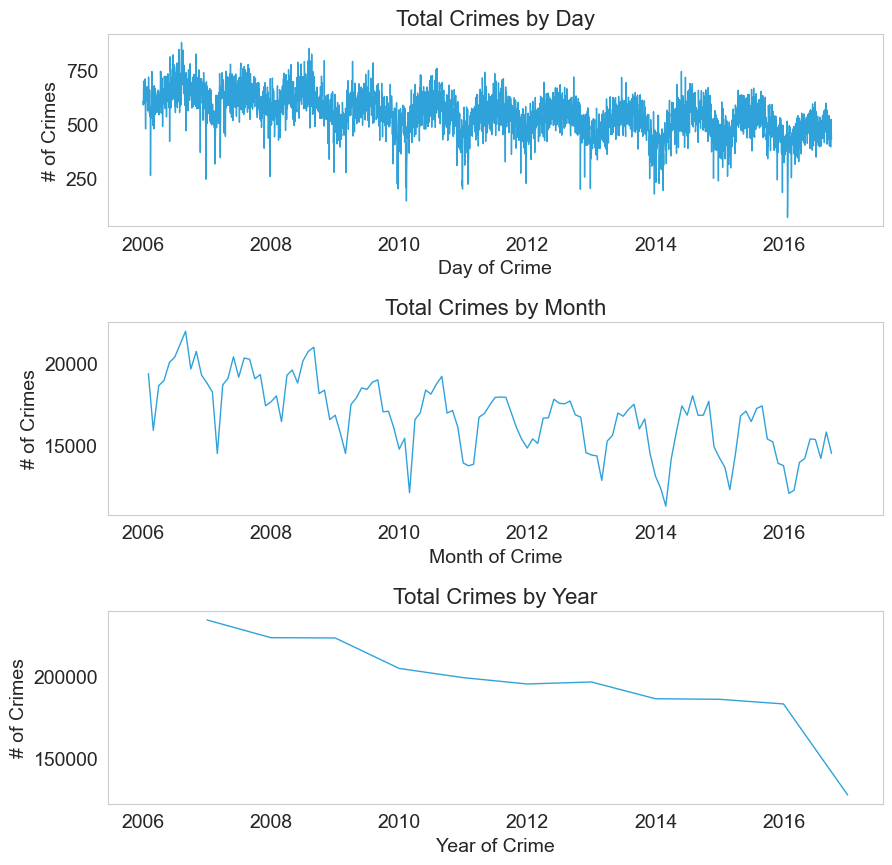

In [17]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=.5)
ax1 = fig.add_subplot(3,1,1)
ax1.plot(df['crimes'].resample('D').count(),linewidth=1)
ax1.set_title('Total Crimes by Day', fontsize=16)
ax1.set_ylabel('# of Crimes', fontsize=14)
ax1.set_xlabel('Day of Crime', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2 = fig.add_subplot(3,1,2, sharex=ax1)
ax2.plot(df['crimes'].resample('M').count(),linewidth=1)
ax2.set_title('Total Crimes by Month', fontsize=16)
ax2.set_ylabel('# of Crimes', fontsize=14)
ax2.set_xlabel('Month of Crime', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

ax3  = fig.add_subplot(3,1,3, sharex=ax1)
ax3.plot(df['crimes'].resample('A').count(),linewidth=1)
ax3.set_title('Total Crimes by Year', fontsize=16)
ax3.set_ylabel('# of Crimes', fontsize=14)
ax3.set_xlabel('Year of Crime', fontsize=14)
ax3.tick_params(axis='both', which='major', labelsize=14)